In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import skimage.io as io

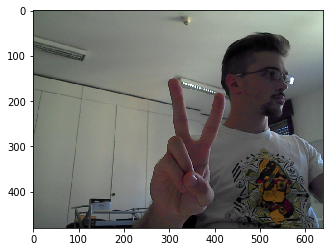

In [270]:
img = io.imread("1-color_2.png")
plt.imshow(img)


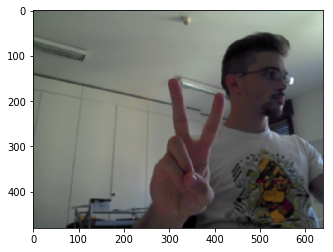

In [271]:
img = cv2.GaussianBlur(img,(5,5),4)
plt.imshow(img)

In [272]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

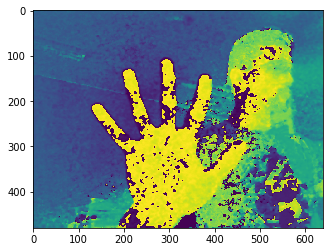

In [264]:
plt.imshow(img_hsv[:, :, 0])

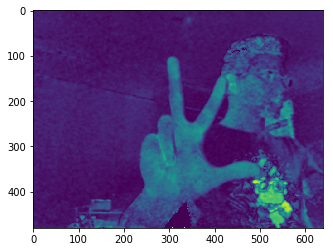

In [200]:
plt.imshow(img_hsv[:, :, 1])

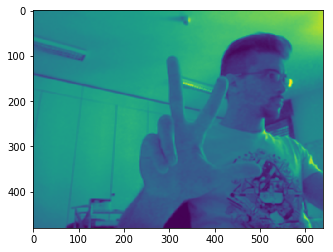

In [201]:
plt.imshow(img_hsv[:, :, 2])

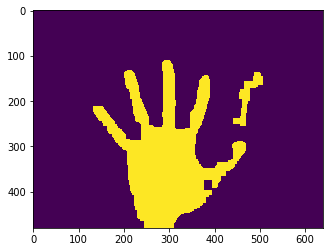

In [152]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, black_tophat
# 315, 94, 37
lower = np.array([170, 30, 80])
upper = np.array([180, 100, 255])
# lower_red = np.array([160, 0, 0])
# upper_red = np.array([190, 255, 255])

mask = cv2.inRange(img_hsv, lower, upper)

# mask = cv2.GaussianBlur(mask,(5,5),10)

mask = mask.astype(np.uint8)
kernel = np.ones((15,15))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((10,10))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
kernel = np.ones((17,17))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # mask_red[mask_red != 255] = 0


mask = mask.astype(np.float32)

plt.imshow(mask)

In [9]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

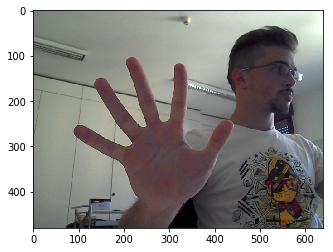

In [463]:
# img = io.imread("1-color_s2_g11.png")
img = io.imread("9-color.png")
# img = io.imread("1-color_s3_g9.png")
# img = io.imread("1-color_s4_g4.png")
# img = io.imread("my22.jpg")
# img = io.imread("3-color_s4_g1.png")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
plt.imshow(img)

In [464]:
# mean_c = [np.mean(img[:,:,0]), np.mean(img[:,:,1]), np.mean(img[:,:,2])]
# img = img.astype(np.float32) / mean_c
# img = np.uint8(img / np.amax(img) * 255)
# plt.imshow(img)

In [465]:
# img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

In [466]:
# img[:,:,2].max()

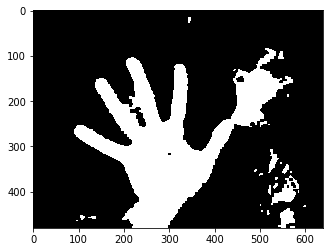

In [467]:
# lower = np.array([170, 30, 70])
# upper = np.array([180, 100, 100])

# lower = np.array([170, 30, 80])
# upper = np.array([180, 100, 100])

lower = np.array([170, 40, 80])
upper = np.array([180, 255, 255])

# lower = np.array([150, 40, 110])
# upper = np.array([200, 110, 150])

# (0, 133, 77)
# (255, 173, 127)

lower = np.array([50, 70, 135])
upper = np.array([255,135, 180])

# lower = np.array([90, 70, 135])
# upper = np.array([205,135, 180])

mask = cv2.inRange(img_hsv, lower, upper)

# mask = cv2.GaussianBlur(mask,(3,3),7)

mask = mask.astype(np.uint8)
kernel = np.ones((5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((3,3))
# mask = cv2.GaussianBlur(mask,(7,7),7)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((25,25))
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # mask_red[mask_red != 255] = 0


# mask = mask.astype(np.uint8)
# kernel = np.ones((10,10))
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# kernel = np.ones((3,3))
# # mask = cv2.GaussianBlur(mask,(7,7),7)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((25,25))
# # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # # mask_red[mask_red != 255] = 0

# mask = cv2.GaussianBlur(mask,(9,9),7)
mask = mask.astype(np.float32)

plt.imshow(mask, cmap='gray')

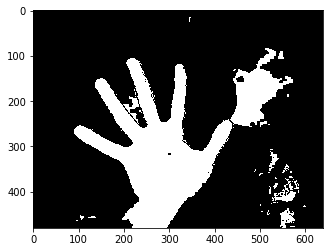

In [468]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def get_edges(img):
    x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    y_sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    return np.hypot(x_sobel, y_sobel)

edges = get_edges(img_gray)

edges /= np.amax(edges)

_, edges = cv2.threshold(edges, 0.1, 1, cv2.THRESH_BINARY)

mask = 1 - ((1 - mask / 255.).astype(np.uint8) | edges.astype(np.uint8))
mask = np.uint8(mask * 255)

plt.imshow(mask, cmap='gray')

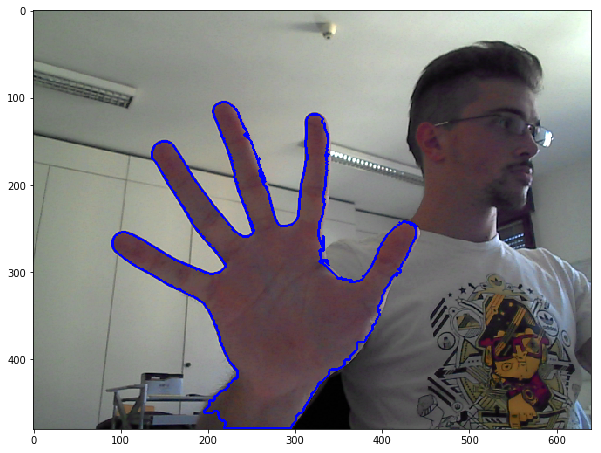

In [469]:
_, contours, _ = cv2.findContours(np.uint8(mask), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
# print("??", contours, len(contours))
#     if(len(contours) == 1):
#         return None, None
    
# \

c = max(contours, key = cv2.contourArea)

# hull = cv2.convexHull(contours[cnt_id])

# contours[cnt_id] = hull
plt.figure(figsize=(10,10))
img_cnt = cv2.drawContours(img.copy(), c, -1, (0, 0, 255), 2)



plt.imshow(img_cnt)

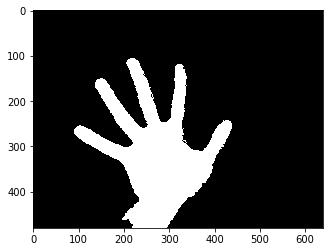

In [485]:
canvas = np.zeros((img.shape[0], img.shape[1], 3)).astype(np.uint8)
cv2.drawContours(canvas, [c], -1, (255, 255, 255), -1)

x,y,w,h = cv2.boundingRect(c)
# cv2.rectangle(canvas,(x,y),(x+w,y+h),(0,255,0),2)


plt.imshow(canvas)

In [486]:
w, h

(350, 375)

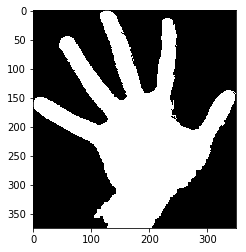

In [487]:
plt.imshow(canvas[y:(y+h), x:(x+w)])

30 480 21 511


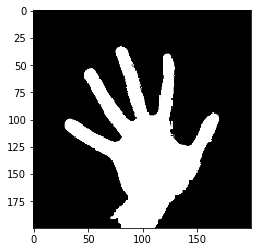

In [497]:
ly = max(0, int(y - h * 0.2))
ry = min(canvas.shape[0], int(y + h + h * 0.2))
tx = max(0, int(x - w * 0.2))
bx = min(canvas.shape[1], int(x + w + w * 0.2))



resized = cv2.resize(canvas[ly:ry, tx:bx], (200, 200))
plt.imshow(resized)
print(ly, ry, tx, bx)

In [498]:
_, resized = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)

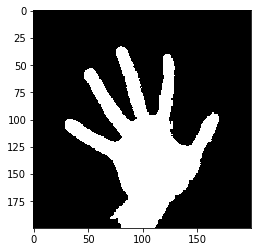

In [499]:
plt.imshow(resized)

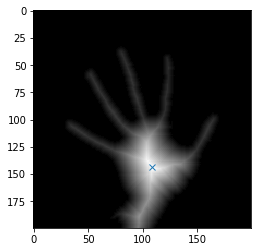

In [500]:
# dst = np.zeros(resized.shape, dtype= )
dst = cv2.distanceTransform(resized[:, :, 0], cv2.DIST_L2, 3)
plt.imshow(dst, cmap='gray')
c = np.unravel_index(np.argmax(dst), dst.shape)
palm_c = (c[1], c[0])
plt.plot(palm_c[0], palm_c[1], 'x')

In [501]:
np.unravel_index(np.argmax(dst), dst.shape)

(144, 109)

In [505]:
np.max(dst) * 1.2

38.93849487304687

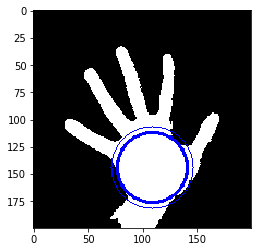

In [508]:
center_coordinates = palm_c
 
# Radius of circle
radius = int(np.max(dst) * 1.2)
  
# Blue color in BGR
color = (0, 0, 255)
  
# Line thickness of 2 px
thickness = 1
  
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv2.circle(resized, center_coordinates, radius, color, thickness)
plt.imshow(image)

In [ ]:
def find_nearest_boundary_points(sampled_points):
    nearest_boundary_points = []
    for point in sampled_points:
        while(True):
            